In [1]:
!pip install -q --upgrade torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1+cu124 --index-url https://download.pytorch.org/whl/cu124

!pip install -q --upgrade transformers==4.48.3 datasets==3.2.0 diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.2/908.2 MB 996.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from huggingface_hub import login
from diffusers import DiffusionPipeline
from transformers import pipeline
from google.colab import userdata
from datasets import load_dataset
from IPython.display import Audio
import soundfile as sf
hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

In [3]:
classifier = pipeline("sentiment-analysis", device="cuda")
result = classifier("I'm super exiceted to learn LLM engineering")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9963186979293823}]


In [4]:
ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("VibeVoice is a novel framework designed for generating expressive, long-form, multi-speaker conversational audio, such as podcasts, from text. It addresses significant challenges in traditional Text-to-Speech (TTS) systems, particularly in scalability, speaker consistency, and natural turn-taking.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'ORG', 'score': np.float32(0.70303273), 'word': 'V', 'start': 0, 'end': 1}, {'entity_group': 'ORG', 'score': np.float32(0.647831), 'word': '##Voice', 'start': 4, 'end': 9}, {'entity_group': 'MISC', 'score': np.float32(0.8707309), 'word': 'Text - to - Speech', 'start': 194, 'end': 208}, {'entity_group': 'MISC', 'score': np.float32(0.8065529), 'word': 'TTS', 'start': 210, 'end': 213}]


/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [5]:
question_answerer = pipeline("question-answering", device="cuda")
result = question_answerer(question="What is vibevoice", context="VibeVoice is a novel framework designed for generating expressive, long-form, multi-speaker conversational audio, such as podcasts, from text. It addresses significant challenges in traditional Text-to-Speech (TTS) systems, particularly in scalability, speaker consistency, and natural turn-taking.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.42808496952056885, 'start': 13, 'end': 30, 'answer': 'a novel framework'}


In [6]:
summarizer = pipeline("summarization", device="cuda")
text = """
VibeVoice: A Frontier Open-Source Text-to-Speech Model
VibeVoice is a novel framework designed for generating expressive, long-form, multi-speaker conversational audio, such as podcasts, from text. It addresses significant challenges in traditional Text-to-Speech (TTS) systems, particularly in scalability, speaker consistency, and natural turn-taking.

A core innovation of VibeVoice is its use of continuous speech tokenizers (Acoustic and Semantic) operating at an ultra-low frame rate of 7.5 Hz. These tokenizers efficiently preserve audio fidelity while significantly boosting computational efficiency for processing long sequences. VibeVoice employs a next-token diffusion framework, leveraging a Large Language Model (LLM) to understand textual context and dialogue flow, and a diffusion head to generate high-fidelity acoustic details.

The model can synthesize speech up to 90 minutes long with up to 4 distinct speakers, surpassing the typical 1-2 speaker limits of many prior models.
"""
summary = summarizer(text, max_length=100, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


 VibeVoice: A Frontier Open-Source Text-to-Speech Model . Can synthesize speech up to 90 minutes long with up to 4 distinct speakers . Uses continuous speech tokenizers (Acoustic and Semantic) operating at


In [16]:
translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("The model can synthesize speech up to 90 minutes long with up to 4 distinct speakers, surpassing the typical 1-2 speaker limits of many prior models.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Le modèle peut synthétiser des paroles d'une durée maximale de 90 minutes avec jusqu'à 4 orateurs distincts, dépassant les limites habituelles de 1 ou 2 orateurs de nombreux modèles antérieurs.


In [8]:
classifier = pipeline("zero-shot-classification", device="cuda")
result = classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839740753174, 0.03225007280707359, 0.018365919589996338]}


In [9]:
generator = pipeline("text-generation", device="cuda")
result = generator("A core innovation of VibeVoice is its use of continuous speech tokenizers (Acoustic and Semantic) operating")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


A core innovation of VibeVoice is its use of continuous speech tokenizers (Acoustic and Semantic) operating in addition to token.

Acoustic tokenizers (AS), or voice-related speech tokenizers (ASXL), are used


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

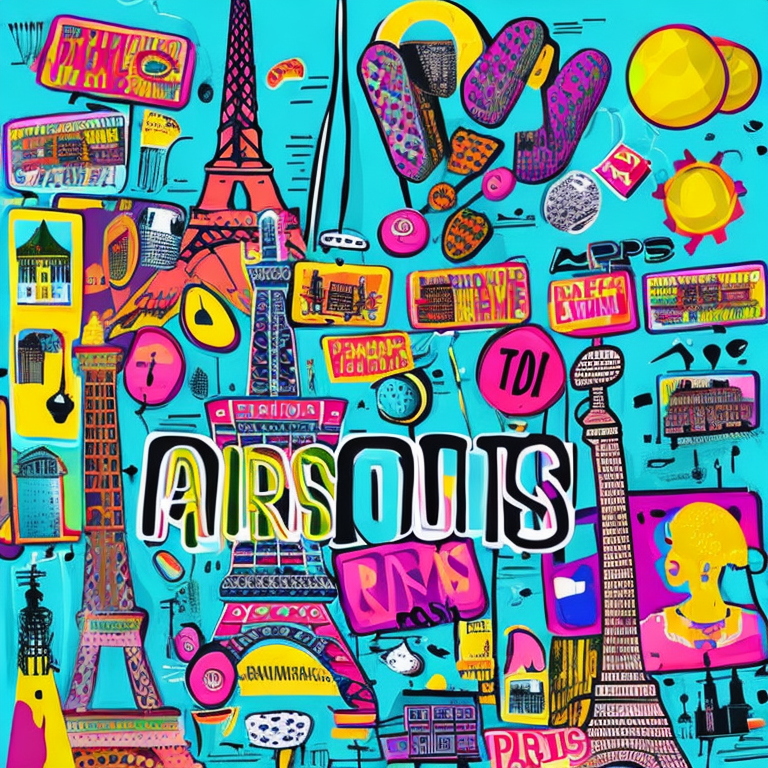

In [10]:
image_gen = DiffusionPipeline.from_pretrained(
"stabilityai/stable-diffusion-2",
torch_dtype=torch.float16,
use_safetensors=True,
variant="fp16"
).to("cuda")

text ="An image representing a vacation in paris, showing tourist spots and everything unique about paris, in a vibrant pop-art style"
image = image_gen(prompt=text).images[0]
image

In [19]:
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')

embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[5105]["xvector"]).unsqueeze(0)

speech = synthesiser("""VibeVoice: A Frontier Open-Source Text-to-Speech Model
VibeVoice is a novel framework designed for generating expressive, long-form, multi-speaker conversational audio, such as podcasts, from text./""", forward_params={"speaker_embeddings": speaker_embedding})

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])
Audio("speech.wav")

Device set to use cuda
